# TP1 Data visualization


Imports and config

In [1]:
import numpy as np
import math
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import regex as re
import json

from mpstyle import mpSetParamStyle,setMplFont
mpSetParamStyle("default",True)

setMplFont()# Algorithm constants
with open("config/config.json") as f :   
    config = json.load(open("config/config.json"))

### Data loading from file

In [2]:
def load_file(filename) :
    pattern = "N = (\d+) \| (.+)"
    X, T = [], []
    with open(filename) as f :
        data = f.read().splitlines()
        for line in data :
            x = re.match(pattern,line).groups()
            X.append(int(x[0]))
            T.append(float(x[1])/1000)
    return np.array(X), np.array(T)

# Analysis code

In [36]:
def powerTest(X, Y, text = True) :
    model = LinearRegression()
    x, y = np.log(X).reshape((-1, 1)), np.log(Y)
    model.fit(x, y)
    
    power = model.coef_[0]
    correlation = model.score(x, y)
    
    if text :
        print("\n===== Power test =====")
        print(f"Correlation: {correlation:.4f}")
        print(f"Empirical power: {power:.3f}")
    return power

def powerTestExp(X, Y, text = True) :
    model = LinearRegression()
    x, y = X.reshape((-1, 1)), np.log(Y)
    model.fit(x, y)
    
    power = model.coef_[0]
    correlation = model.score(x, y)
    power = np.e**power
    if text :
        print("\n===== Power test =====")
        print(f"Correlation: {correlation:.4f}")
        print(f"Empirical power: {power:.3f}")
    return power

def ratioTest(X, Y, power, text = True) :
    ratio_Y = Y / (X**power)
    coef = np.average(ratio_Y)
    if text :
        print("\n===== Ratio test =====")
        print(f"Ratio of y/f(x): {coef:.2e}")
    return coef

def ratioTestExp(X, Y, power, text = True) :
    ratio_Y = Y / (power**X)
    coef = np.average(ratio_Y)
    if text :
        print("\n===== Ratio test =====")
        print(f"Ratio of y/f(x): {coef:.2e}")
    return coef

def constantTest(X, Y, power, coef, text = True) :
    approx = coef * X**power
    model = LinearRegression()
    x = approx.reshape((-1, 1))
    model.fit(x, Y)
    a = model.coef_[0]
    b = model.intercept_
    correlation = model.score(x, Y)
    if text :
        print("\n===== Constant test =====")
        print(f"Correlation: {correlation:.4f}")
        print(f"Approximation: y = {a:.3f} * f(x) + {b:.1f}")

    return coef * a, b

def constantTestExp(X, Y, power, coef, text = True) :
    approx = coef * power**X
    model = LinearRegression()
    x = approx.reshape((-1, 1))
    model.fit(x, Y)
    a = model.coef_[0]
    b = model.intercept_
    correlation = model.score(x, Y)
    if text :
        print("\n===== Constant test =====")
        print(f"Correlation: {correlation:.4f}")
        print(f"Approximation: y = {a:.3f} * f(x) + {b:.1f}")

    return coef * a, b

In [34]:
kw_maj = {"which" : 'major', "linewidth" : 1, "linestyle" : "-"}
kw_min = {"which" : 'minor', "linewidth" : 1, "linestyle" : ":"}

def plots(X, Y, algo, a, b, c, p, exp = False):
    color_ = config[algo]["color"]
    kw_plot = {"color" : color_, "linewidth" : 2}
    # Power Test
    plt.plot(X, Y, **kw_plot)
    plt.grid(**kw_maj)
    plt.grid(**kw_min)
    if not exp:
        plt.xscale('log')
    plt.yscale('log')
    lab = "Number of points" + (" (log)" if not exp else "")
    plt.xlabel(lab); plt.ylabel("Execution time (s) (log)")
    plt.title(f"Power test - {algo}")
    plt.show()
    # Ratio Test
    ratio = Y / (X**p) if not exp else Y / (p**X)
    plt.plot(X, ratio, **kw_plot)
    plt.grid(**kw_maj)
    plt.ylim([c*0.6, c*1.4])
    plt.title(f"Ratio test - {algo}")
    plt.xlabel("Number of points"); plt.ylabel(r"Ratio $y/f(x)$")
    plt.show()
    # Constant Test
    approx = c * X**p if not exp else c * p**X
    plt.plot(approx, Y, **kw_plot)
    plt.grid(**kw_maj)
    plt.title(f"Constant test - {algo}")
    plt.xlabel(r"$f(x)$"); plt.ylabel(r"$y$")
    plt.show()
    
def finalPrint(X, Y, F, algo) :
    kw_main  = {"color" : config[algo]["color"], "linewidth" : 2, 
                "marker" : 'o', "markersize" : 6}
    kw_estim = {"color" : config["estim_color"], "linewidth" : 2}
    max_size = config[algo]["Msize"]
    plt.plot(X,Y, label=f"{algo} empirical time", **kw_main)
    x = np.linspace(32,max_size,max_size-32+1)
    y = F(x)
    plt.plot(x,y, label="Estimation", **kw_estim)
    plt.grid(**kw_maj)
    plt.title("Comparison between empirical and estimated time")
    plt.xlabel("Matrix size")
    plt.ylabel("Execution time (s)")
    plt.legend()
    plt.show()


===== Power test =====
Correlation: 1.0000
Empirical power: 1.991

===== Ratio test =====
Ratio of y/f(x): 2.19e-09

===== Constant test =====
Correlation: 1.0000
Approximation: y = 1.012 * f(x) + -0.0


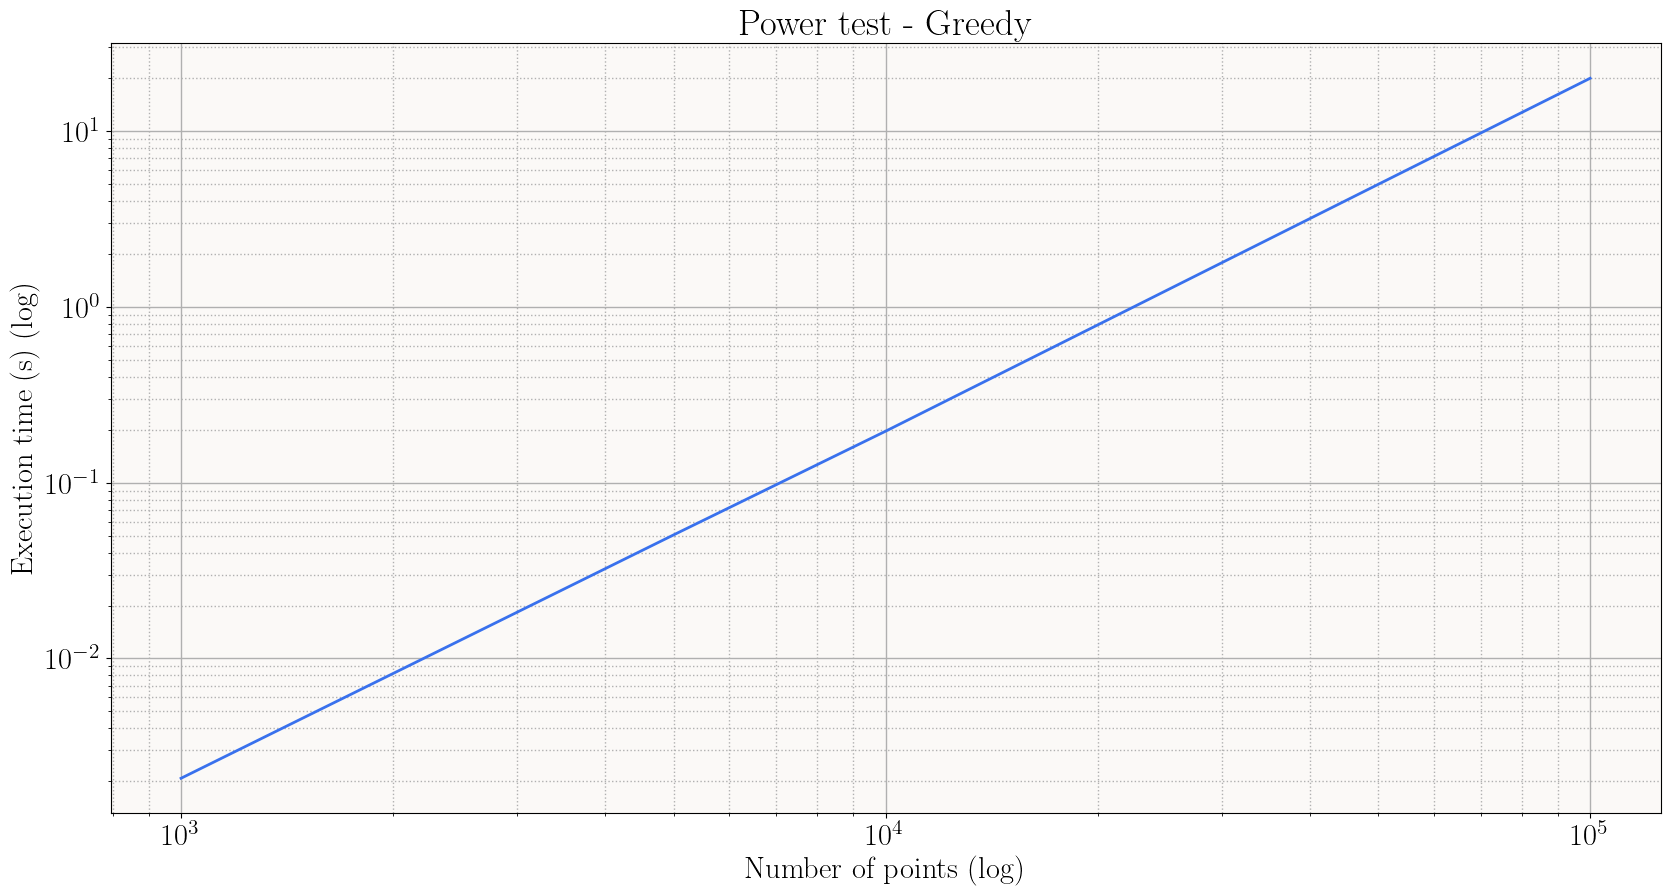

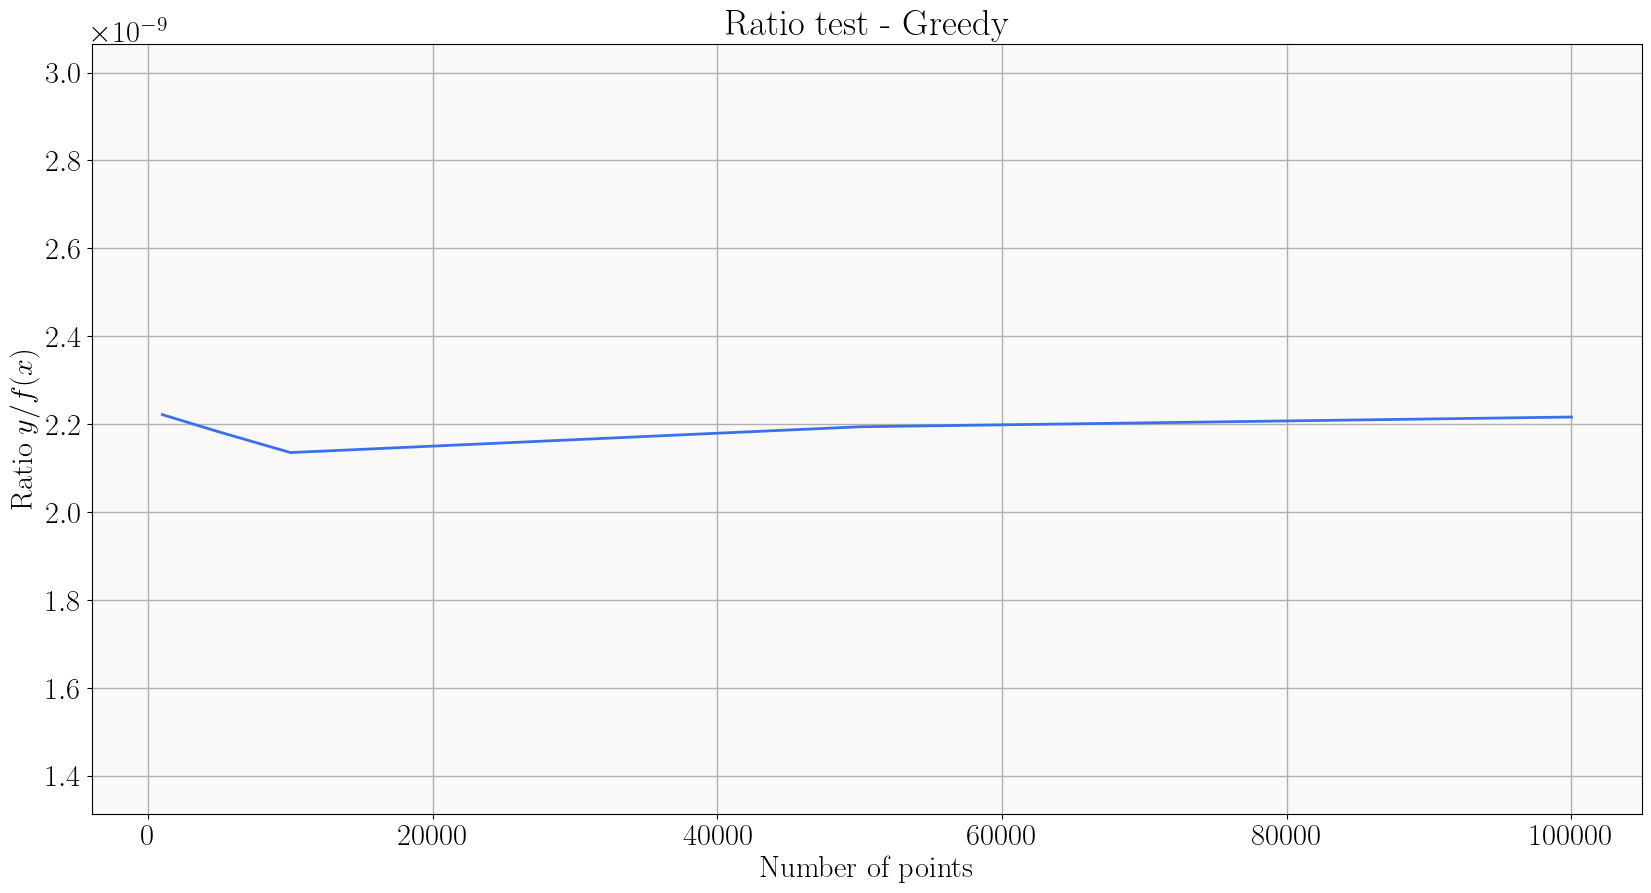

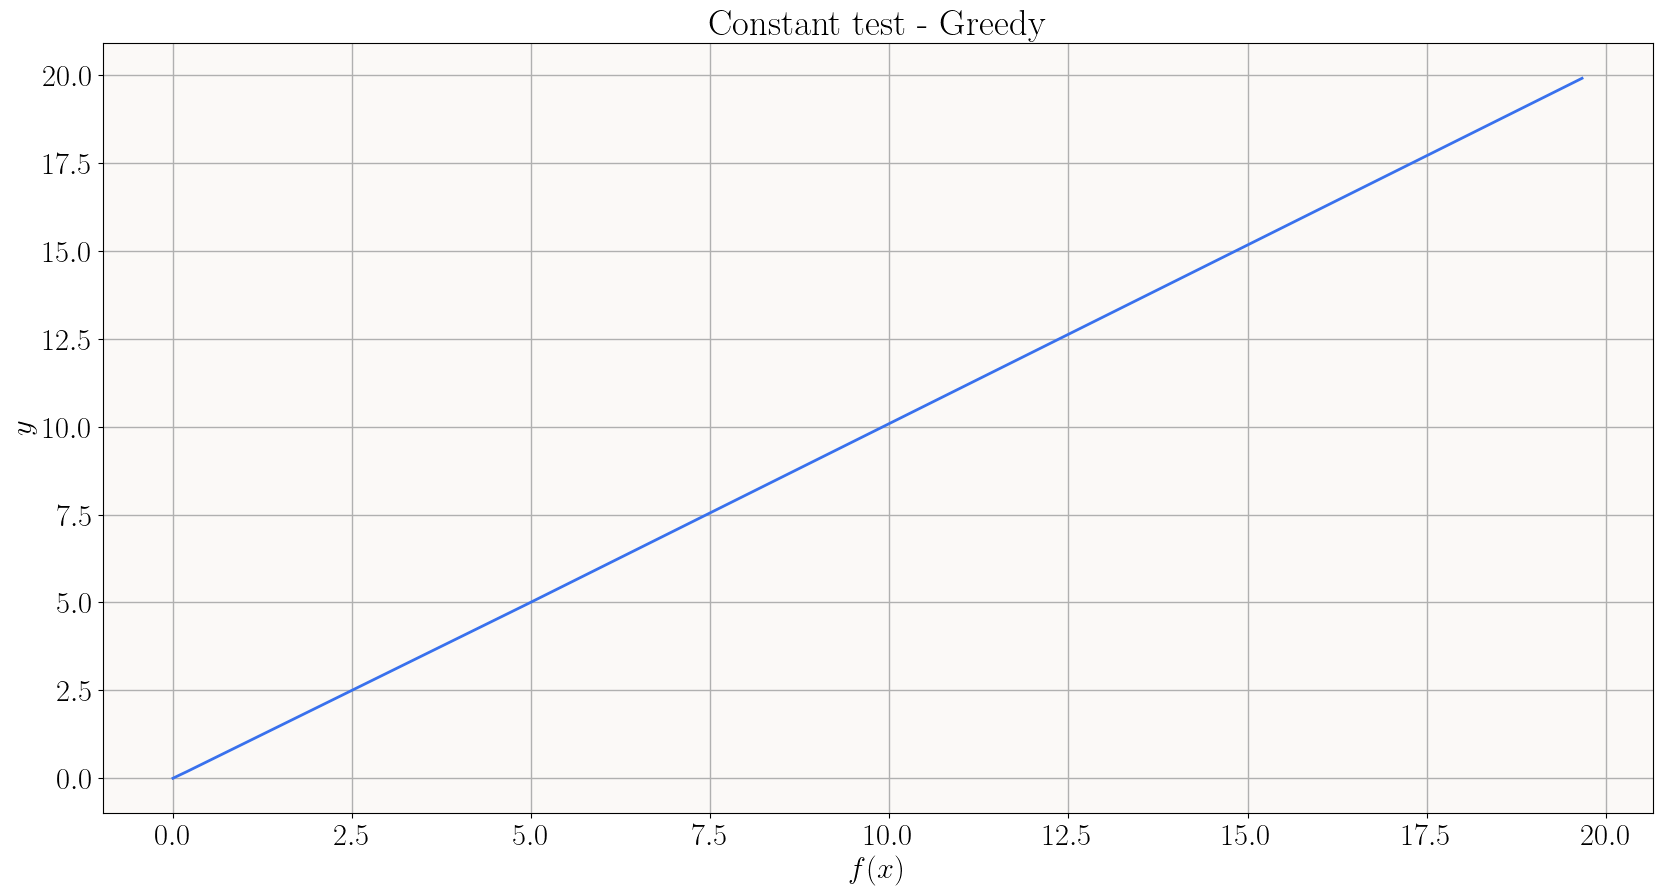

In [5]:
X, T = load_file("res/greed.txt")

p = powerTest(X, T, True)
c = ratioTest(X, T, p, True)
a, b = constantTest(X, T, p, c, True)
plots(X, T, "Greedy", a, b, c, p)


===== Power test =====
Correlation: 0.9996
Empirical power: 2.010

===== Ratio test =====
Ratio of y/f(x): 5.17e-09

===== Constant test =====
Correlation: 1.0000
Approximation: y = 1.042 * f(x) + -0.1


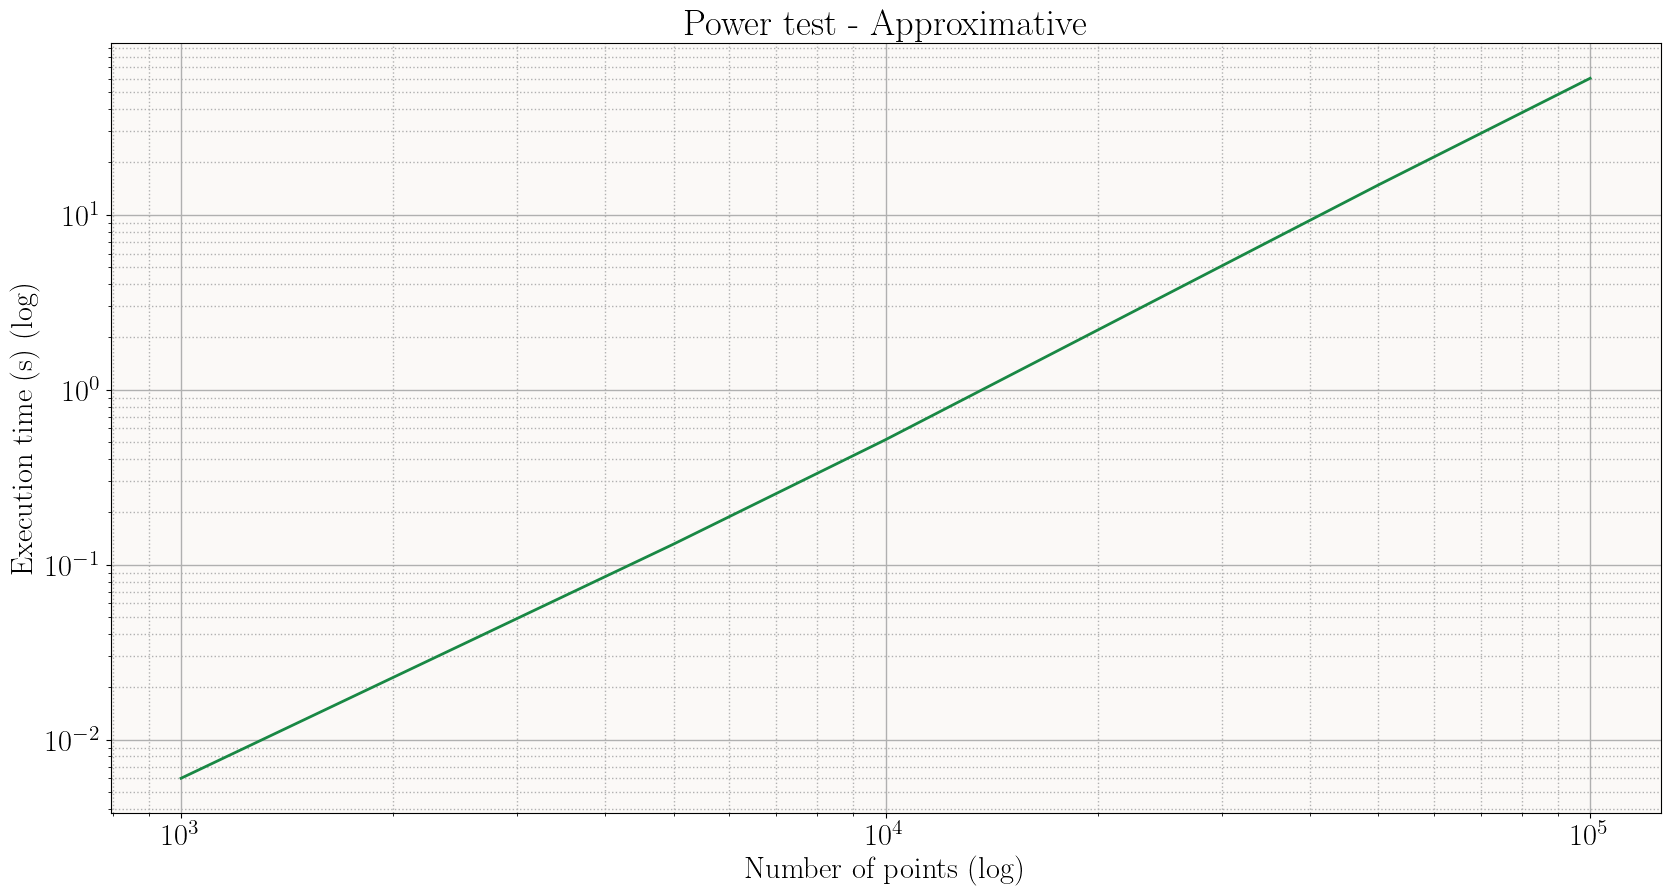

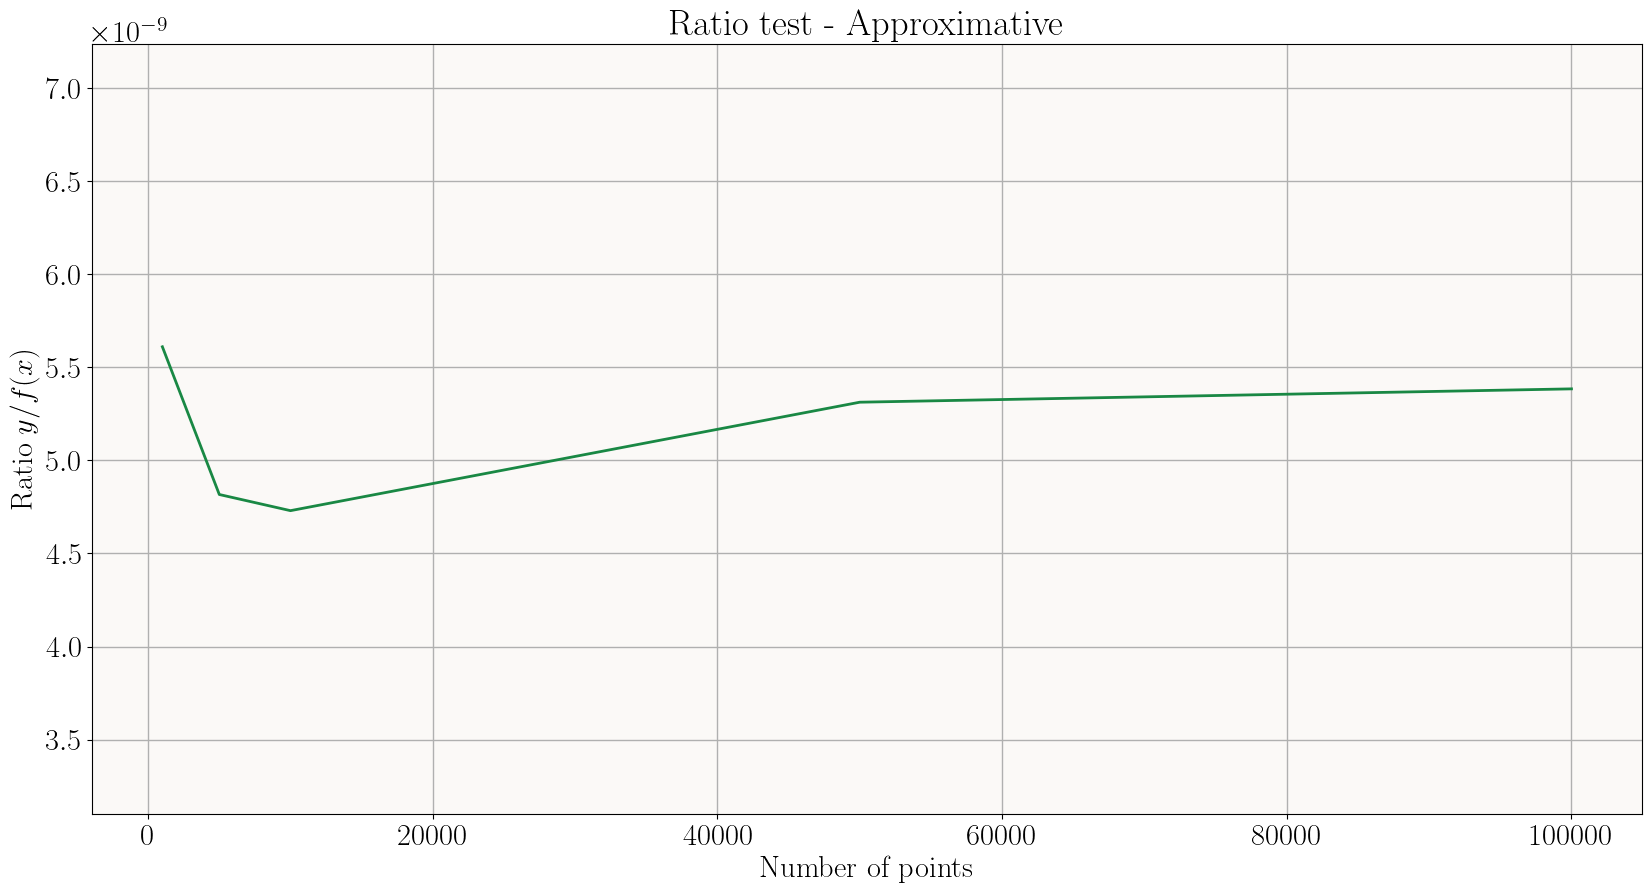

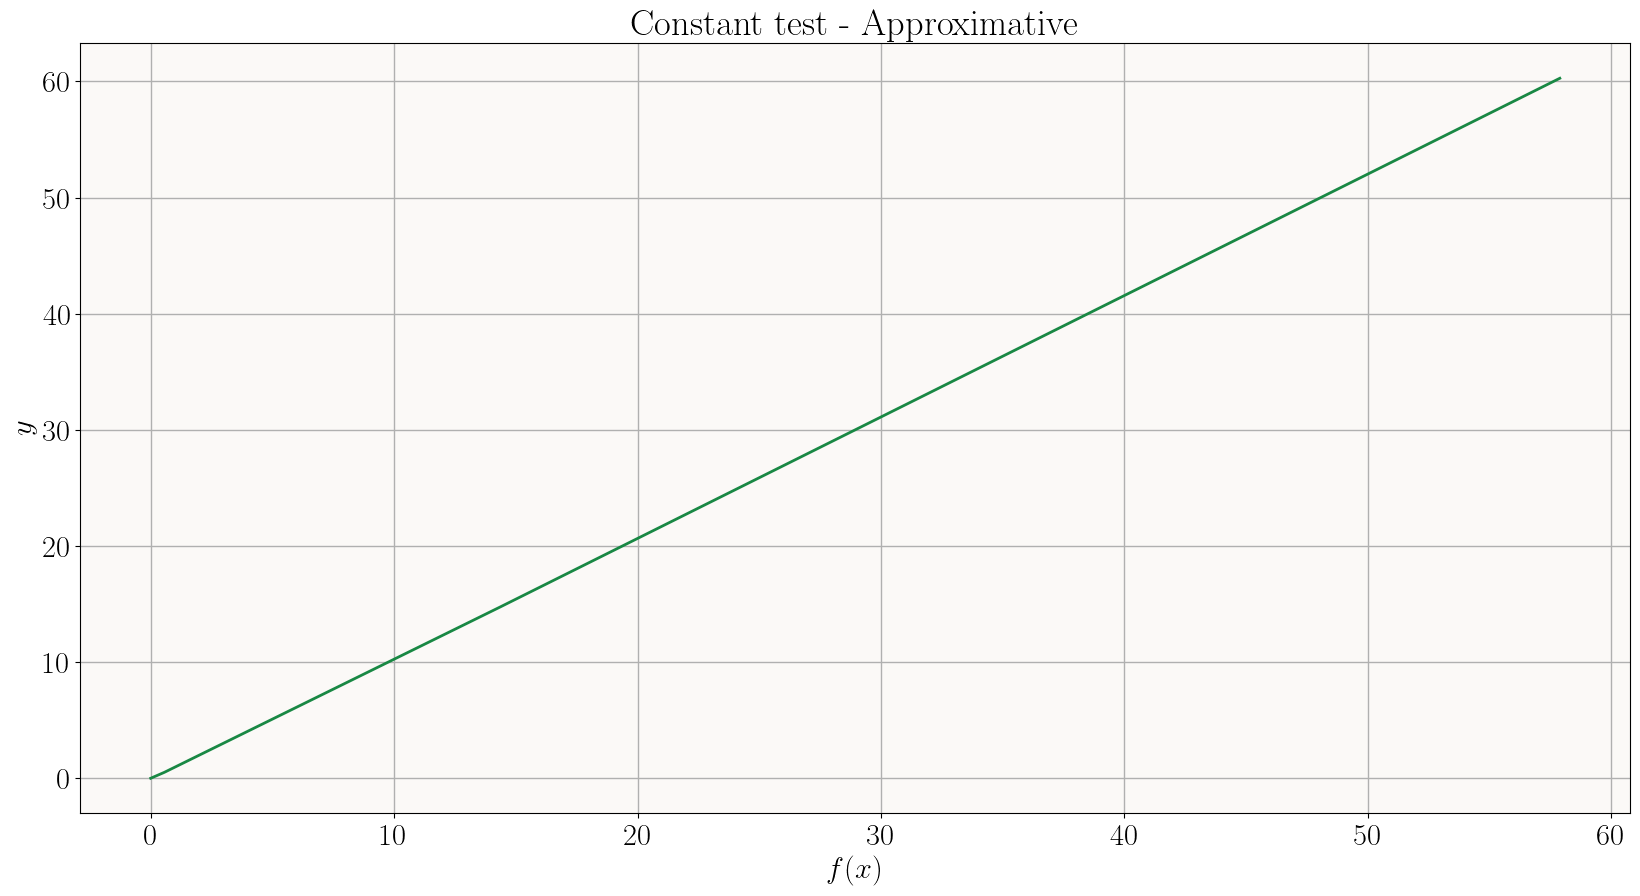

In [37]:
X, T = load_file("res/approx.txt")

p = powerTest(X, T, True)
c = ratioTest(X, T, p, True)
a, b = constantTest(X, T, p, c, True)
plots(X, T, "Approximative", a, b, c, p)

2.516829564213142

===== Power test =====
Correlation: 1.0000
Empirical power: 2.518

===== Ratio test =====
Ratio of y/f(x): 1.21e-07

===== Constant test =====
Correlation: 1.0000
Approximation: y = 1.031 * f(x) + -0.0


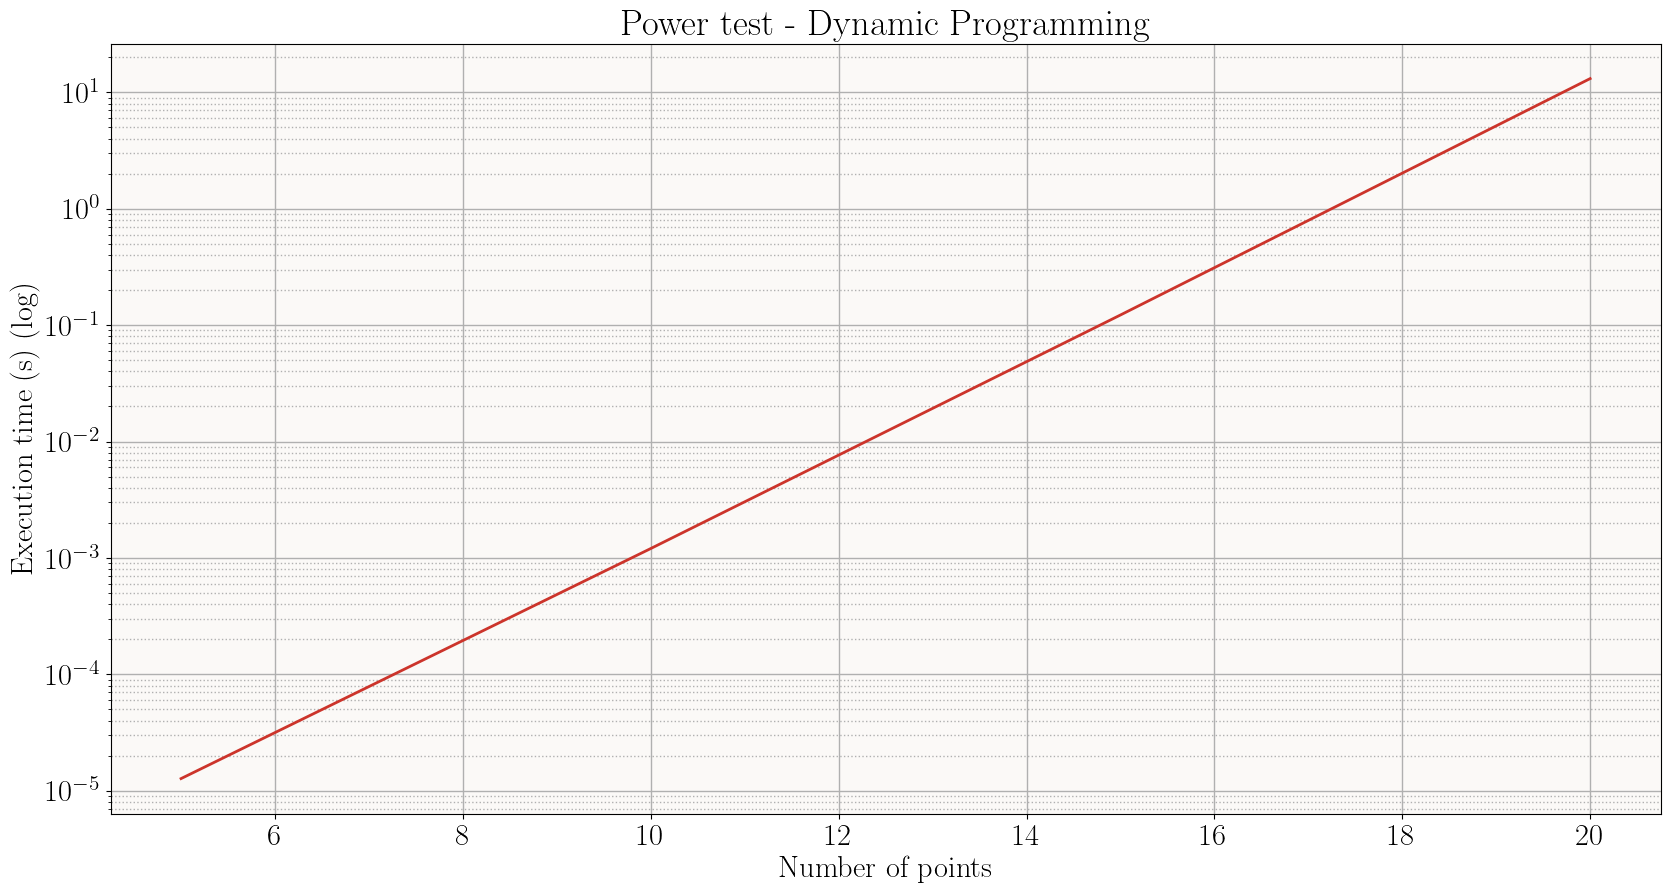

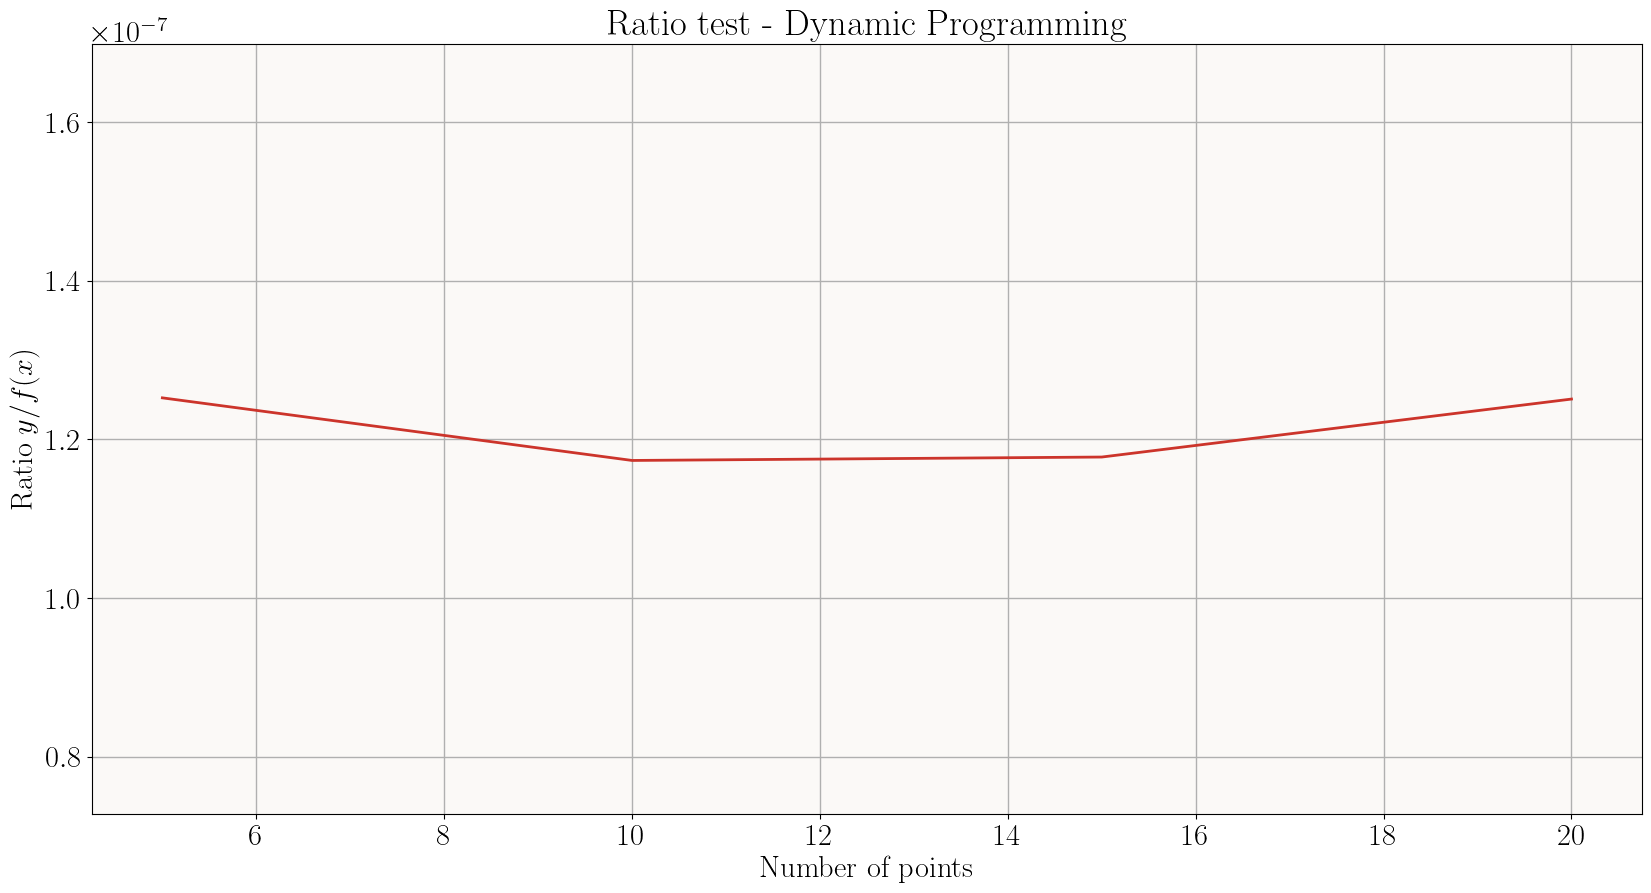

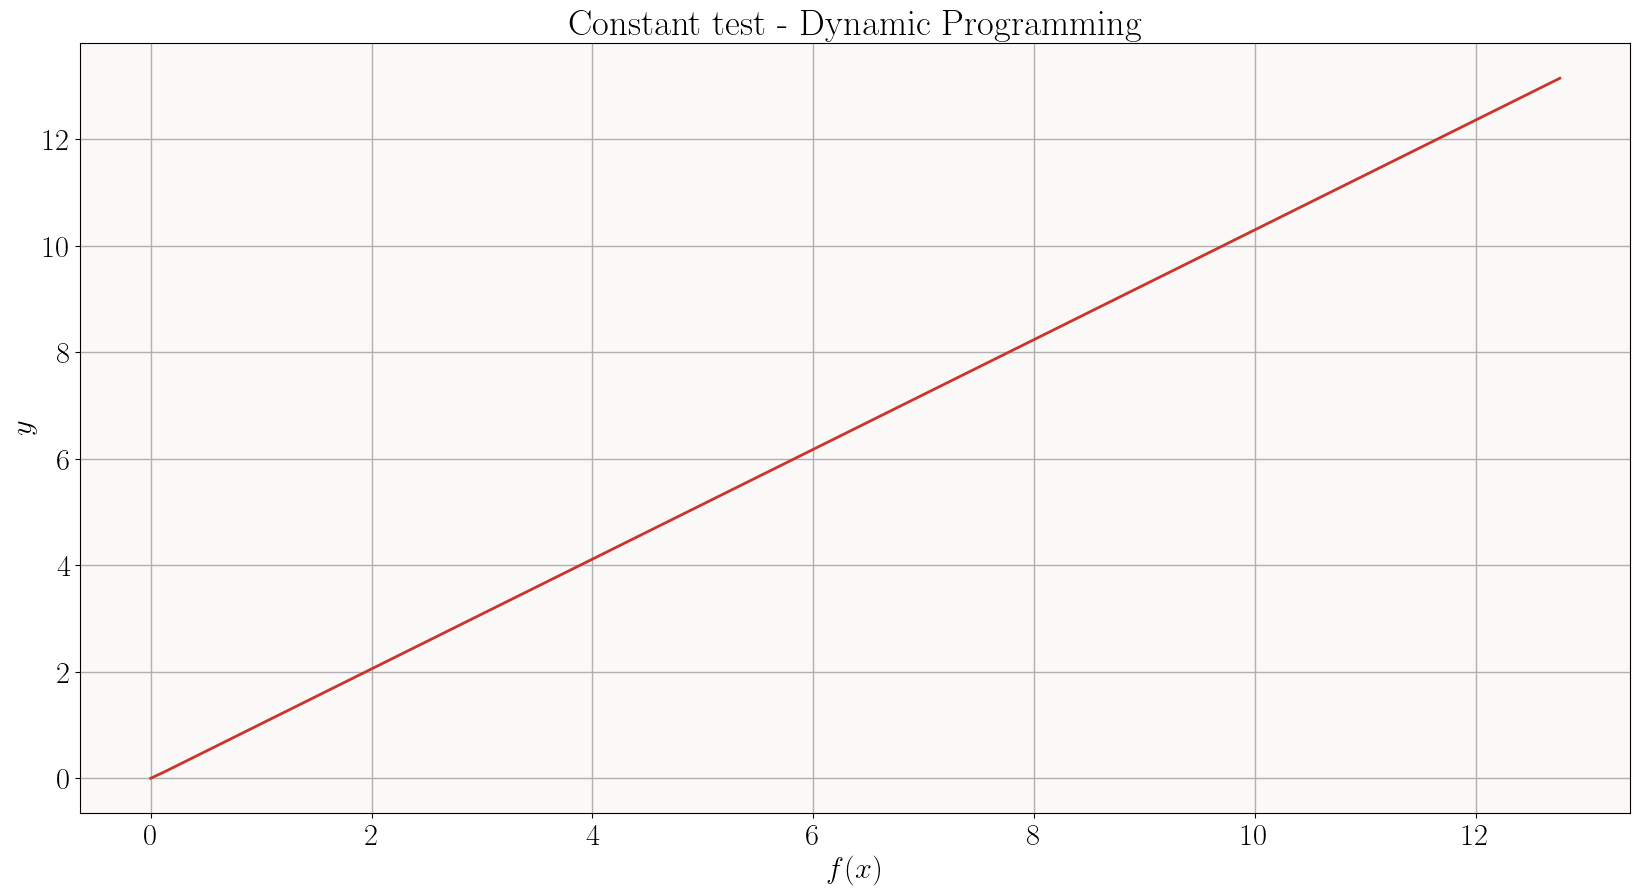

In [38]:
X, T = load_file("res/dp.txt")
print(np.e**0.923)
p = powerTestExp(X, T, True)
c = ratioTestExp(X, T, p, True)
a, b = constantTestExp(X, T, p, c, True)
plots(X, T, "Dynamic Programming", a, b, c, p, exp=True)